In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebraa
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amex-default-prediction/sample_submission.csv
/kaggle/input/amex-default-prediction/train_data.csv
/kaggle/input/amex-default-prediction/test_data.csv
/kaggle/input/amex-default-prediction/train_labels.csv


In [59]:
#loading the data in chunks using chunksize because the total records are more than 5.5 million
import time 
start_time = time.time()
chunk = 100000
results = []
iterator = pd.read_csv('/kaggle/input/amex-default-prediction/train_data.csv', chunksize= chunk)

for ch in iterator:
    print(len(ch))
    ch = ch.sample(frac=1)
    df_unique_customer = ch.groupby('customer_ID',as_index=False).last()
    results.append(df_unique_customer)
final_result = pd.concat(results)
end_time = time.time()
print(f'Execution time is {(end_time-start_time)/60} mins')

100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
31451
Execution time is 6.26499522527059 mins


In [60]:
final_result.shape

(458966, 190)

In [62]:
final_result.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-10-08,0.914767,0.003029,0.014324,1.000242,0.000263,0.108115,0.009527,0.007836,...,NaN,NaN,NaN,0.002397,0.008452,0.005553,NaN,0.001831,0.009616,0.007385
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,2018-02-06,0.878856,0.536290,0.034558,1.005419,0.007248,0.159486,0.006274,0.008733,...,NaN,NaN,NaN,0.006658,0.004627,0.004820,NaN,0.008272,0.002528,0.003584
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,2017-08-12,0.902419,0.005366,0.003352,0.811922,0.004008,NaN,0.008727,0.006270,...,NaN,NaN,NaN,0.000371,0.005389,0.000652,NaN,0.002085,0.008756,0.006932
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,2017-03-31,0.567442,0.268476,0.070311,0.812053,0.004228,0.407420,0.007732,0.010927,...,NaN,NaN,NaN,0.003295,0.004272,0.000242,NaN,0.006266,0.001873,0.007589
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,2017-12-30,0.877417,0.001762,0.007947,0.810670,0.003196,0.175228,0.009694,0.004701,...,NaN,NaN,NaN,0.000717,0.006562,0.002827,NaN,0.002523,0.005427,0.009169


In [4]:
# loading train labels and joining the two datasets with customer_ID
df_labels = pd.read_csv('/kaggle/input/amex-default-prediction/train_labels.csv')
df_train_combined = pd.merge(final_result,df_labels, on='customer_ID')
df_train_combined.shape

(458966, 191)

In [63]:
df_train_combined.head()

,customer_ID,Date,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2018-02-21,0.937349,0.002425,0.019837,1.008307,0.000607,0.102985,0.006174,0.007454,...,NaN,NaN,0.001563,0.001976,0.002569,NaN,0.001098,0.006346,0.004204,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,2017-07-30,0.901860,0.325467,0.109644,1.005098,0.008041,0.108526,0.000732,0.005484,...,NaN,NaN,0.000275,0.007992,0.006918,NaN,0.009869,0.002979,0.005527,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,2017-08-12,0.902419,0.005366,0.003352,0.811922,0.004008,NaN,0.008727,0.006270,...,NaN,NaN,0.000371,0.005389,0.000652,NaN,0.002085,0.008756,0.006932,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,2017-03-31,0.567442,0.268476,0.070311,0.812053,0.004228,0.407420,0.007732,0.010927,...,NaN,NaN,0.003295,0.004272,0.000242,NaN,0.006266,0.001873,0.007589,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,2017-10-29,0.865890,0.002505,0.000776,0.812337,0.007626,0.176403,0.006487,0.005077,...,NaN,NaN,0.007145,0.005055,0.008695,NaN,0.003080,0.000633,0.005487,0


In [61]:
df_labels.head()

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0


In [6]:
#Renaming the 'S_2' as 'Date' and converting it to datetime datatype
df_train_combined.rename(columns = {'S_2': 'Date'}, inplace = True)
df_train_combined['Date'] = pd.to_datetime(df_train_combined['Date'])

In [7]:
#NULL VALUES 
pd.set_option('display.max_rows',None)
null_mask = df_train_combined.isnull()

# Count the number of null values in each column
null_counts = (null_mask.sum()/len(df_train_combined))*100

In [8]:
null_counts

customer_ID     0.000000
Date            0.000000
P_2             0.530323
D_39            0.000000
B_1             0.000000
B_2             0.006754
R_1             0.000000
S_3            12.333375
D_41            0.006754
B_3             0.006754
D_42           75.263963
D_43           22.460923
D_44            3.827299
B_4             0.000000
D_45            0.006754
B_5             0.000000
R_2             0.000000
D_46           17.425910
D_47            0.000000
D_48            6.279768
D_49           86.574823
B_6             0.008715
B_7             0.000000
B_8             0.649068
D_50           54.263279
D_51            0.000000
B_9             0.000000
R_3             0.000000
D_52            0.249038
P_3             4.690761
B_10            0.000000
D_53           68.609439
S_5             0.000000
B_11            0.000000
S_6             0.000000
D_54            0.006754
R_4             0.000000
S_7            12.333375
B_12            0.000000
S_8             0.000000


In [9]:
#Removing columns that are more than 50% null values

null_percentage = df_train_combined.isnull().sum()/len(df_train_combined)
select_columns = null_percentage < 0.5
df_train_selected = df_train_combined.loc[:,select_columns]

In [10]:
df_train_selected.shape

(458966, 165)

In [11]:
# Onehot encoding of categorical variables
one_hot_df = pd.get_dummies(df_train_selected[['D_63','D_64']])
df_train_one_hot = pd.concat([df_train_selected,one_hot_df], axis = 1)
df_train_one_hot = df_train_one_hot.drop(columns = ['D_63','D_64'], axis = 1)
# Omitting customerId to build the model
df =  df_train_one_hot.iloc[:,1:]

In [159]:
one_hot_df.head()

,D_63_CL,D_63_CO,D_63_CR,D_63_XL,D_63_XM,D_63_XZ,D_64_-1,D_64_O,D_64_R,D_64_U
0,0,0,1,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,1,0,0


In [12]:
# Spliting data into train, test1, and test2 sets based on time frames
train = df[(df['Date'] >= '2017-05-01') & (df['Date'] <= '2018-01-31')]
test1 = df[(df['Date'] >= '2017-03-01') & (df['Date'] <= '2017-04-30')]
test2 = df[(df['Date'] >= '2018-02-01') & (df['Date'] <= '2018-03-31')]

In [13]:
X_train = train.drop(columns = ['Date', 'target'], axis = 1)
y_train = train['target']

X_test1 = test1.drop(columns = ['Date', 'target'], axis = 1)
y_test1 = test1['target']

X_test2 = test2.drop(columns = ['Date', 'target'], axis = 1)
y_test2 = test2['target']

In [64]:
%%time
# Feature importance
import xgboost as xgb

xgb_instance = xgb.XGBClassifier(tree_method='gpu_hist')
model_for_feature_selection = xgb_instance.fit(X_train, y_train)

feature_importance = {'Feature':X_train.columns,'Importance':model_for_feature_selection.feature_importances_}
feature_importance = pd.DataFrame(feature_importance)
feature_importance.sort_values("Importance", inplace=True,ascending=False)
feature_importance.to_csv('feature_importance_model1.csv', index=False)

CPU times: user 5.5 s, sys: 793 ms, total: 6.29 s
Wall time: 4.87 s


In [65]:
feature_importance

,Feature,Importance
0,P_2,0.274026
2,B_1,0.071937
21,B_9,0.035029
9,D_44,0.024217
5,S_3,0.019570
49,B_17,0.017312
16,D_48,0.016738
167,D_64_O,0.016236
7,B_3,0.015767
11,D_45,0.014149


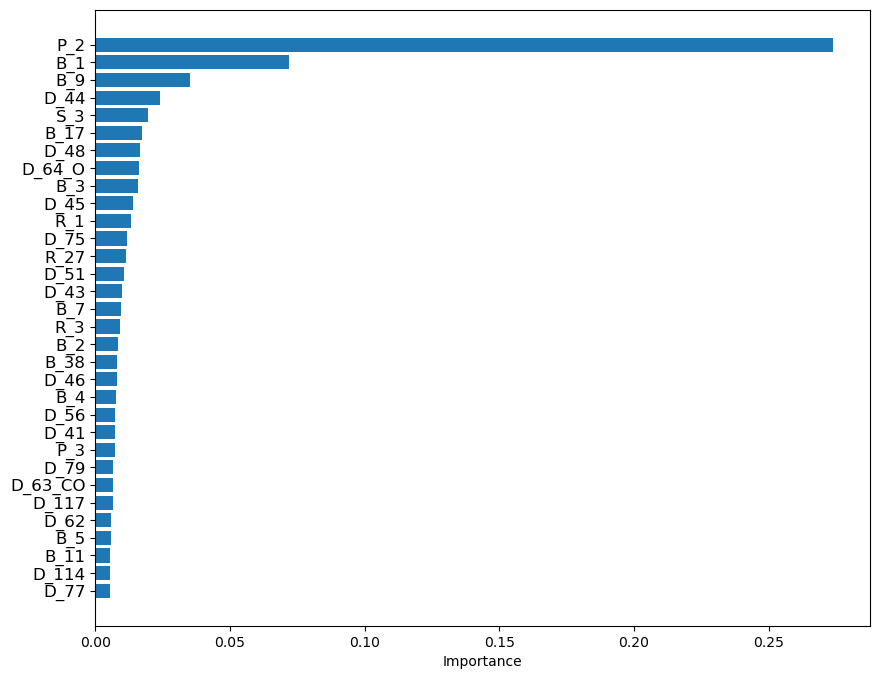

In [168]:
# plot for feature importance
import matplotlib.pyplot as plt
import pandas as pd

# filter dataframe to only include features with importance > 0.005
df_filtered = feature_importance[feature_importance["Importance"] > 0.005].sort_values('Importance', ascending=False)

# create horizontal bar chart with larger figure size
plt.figure(figsize=(10, 8))
plt.barh(df_filtered["Feature"], df_filtered["Importance"])

# set x-axis label
plt.xlabel("Importance")

# increase gap between y-axis labels
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()

# show plot
plt.show()


In [16]:
%%time
# XGB Params
params = {
    'learning_rate': 0.5,
    'max_depth': 4,
    'subsample': 0.5,
    'colsample_bytree': 0.5,
    'scale_pos_weight': 5,
    'objective': 'binary:logistic',
    'n_estimators': 300,
    'random_state': 42
}


# XGBoost model
xgb_model = xgb.XGBClassifier(**params, tree_method = 'gpu_hist')
xgb_model.fit(X_train, y_train)

# Get the feature importance
importance = xgb_model.feature_importances_

# Create a DataFrame of feature names and their importance
feature_importance_model2 = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance})

# Sort the DataFrame in descending order of feature importance
feature_importance_model2 = feature_importance_model2.sort_values(by='Importance', ascending=False)

# Save the feature importance as a CSV file
feature_importance_model2.to_csv('feature_importance_model2.csv', index=False)

CPU times: user 7.53 s, sys: 560 ms, total: 8.09 s
Wall time: 6.7 s


In [17]:
feature_importance_model2.sort_values(by='Importance', ascending = False)

,Feature,Importance
43,D_61,0.126490
21,B_9,0.061708
11,D_45,0.046183
2,B_1,0.045836
0,P_2,0.033782
46,D_62,0.031645
5,S_3,0.027649
9,D_44,0.027234
23,D_52,0.019470
49,B_17,0.019165


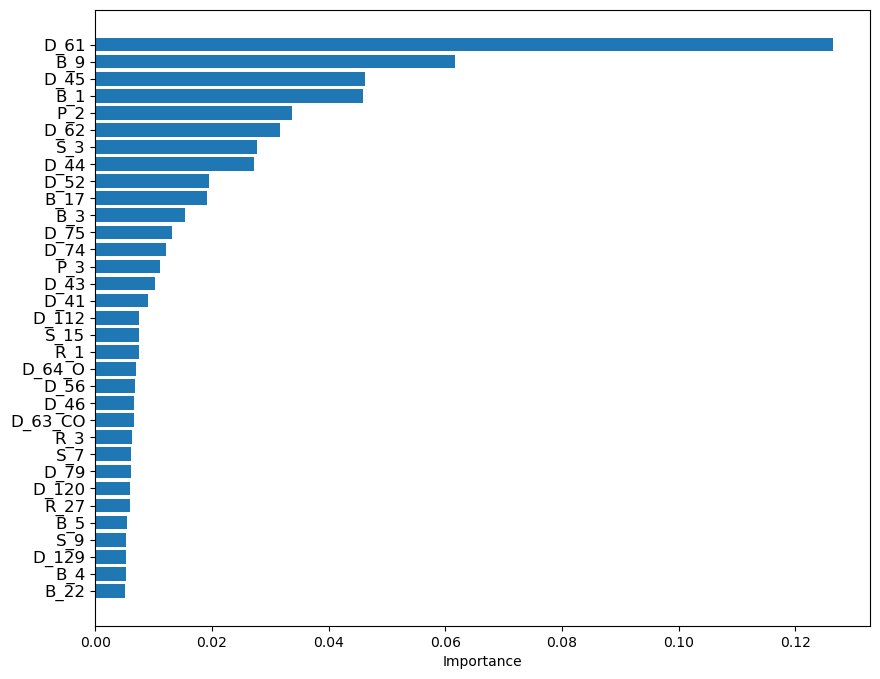

In [169]:
import matplotlib.pyplot as plt
import pandas as pd

# filter dataframe to only include features with importance > 0.005
df_filtered = feature_importance_model2[feature_importance_model2["Importance"] > 0.005].sort_values('Importance', ascending=False)

# create horizontal bar chart with larger figure size
plt.figure(figsize=(10, 8))
plt.barh(df_filtered["Feature"], df_filtered["Importance"])

# set x-axis label
plt.xlabel("Importance")

# increase gap between y-axis labels
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()

# show plot
plt.show()

In [31]:
final_features = feature_importance_model2["Feature"][feature_importance_model2.Importance > 0.005]

X_train_model2 = X_train[final_features]
X_test1_model2 = X_test1[final_features]
X_test2_model2 = X_test2[final_features]

In [170]:
final_features

43        D_61
21         B_9
11        D_45
2          B_1
0          P_2
46        D_62
5          S_3
9         D_44
23        D_52
49        B_17
7          B_3
67        D_75
66        D_74
24         P_3
8         D_43
6         D_41
129      D_112
63        S_15
4          R_1
167     D_64_O
35        D_56
14        D_46
161    D_63_CO
22         R_3
31         S_7
74        D_79
139      D_120
126       R_27
12         B_5
39         S_9
148      D_129
10         B_4
59        B_22
Name: Feature, dtype: object

In [20]:
final_features.to_csv('final_features.csv',index = False)

In [21]:
# Grid search for XGBoost model with different parameters to find out the best model which has hhigh accuracy with low bias and low variance

%%time
from sklearn.metrics import roc_auc_score
table = pd.DataFrame(columns = ["Num Trees",
                                "Learning Rate",
                                "Subsample",
                                "pct_features",
                                "wt_of_default",
                                "AUC Train",
                                "AUC Test1",
                                "AUC Test2"])

row = 0
for num_trees in [50, 100, 300]:
    for LR in [0.01, 0.1]:
        for subsample in [0.5, 0.8]:
            for pctfeatures in [0.5,1]:
                for wtd in [1,5,10]:
                    xgb_instance = xgb.XGBClassifier(tree_method = 'gpu_hist',
                                                     n_estimators=num_trees,
                                                     learning_rate = LR,
                                                     subsample= subsample,
                                                     colsample_bytree= pctfeatures,
                                                     scale_pos_weight = wtd,
                                                     random_state = 42)
                    model = xgb_instance.fit(X_train_model2, y_train)

                    table.loc[row,"Num Trees"] = num_trees
                    table.loc[row,"Learning Rate"] = LR
                    table.loc[row,"Subsample"] = subsample
                    table.loc[row,"pct_features"] = pctfeatures
                    table.loc[row,"wt_of_default"] = wtd
                    table.loc[row,"AUC Train"] = roc_auc_score(y_train, model.predict_proba(X_train_model2)[:,1])
                    table.loc[row,"AUC Test1"] = roc_auc_score(y_test1, model.predict_proba(X_test1_model2)[:,1])
                    table.loc[row,"AUC Test2"] = roc_auc_score(y_test2, model.predict_proba(X_test2_model2)[:,1])

                    row = row + 1

table

CPU times: user 6min 39s, sys: 6.28 s, total: 6min 45s
Wall time: 4min 23s


,Num Trees,Learning Rate,Subsample,pct_features,wt_of_default,AUC Train,AUC Test1,AUC Test2
0,50,0.01,0.5,0.5,1,0.926777,0.912193,0.929804
1,50,0.01,0.5,0.5,5,0.924646,0.910934,0.926917
2,50,0.01,0.5,0.5,10,0.923438,0.909925,0.925496
3,50,0.01,0.5,1,1,0.923499,0.908078,0.926521
4,50,0.01,0.5,1,5,0.921696,0.907445,0.923794
5,50,0.01,0.5,1,10,0.920197,0.906422,0.922303
6,50,0.01,0.8,0.5,1,0.926927,0.91233,0.929747
7,50,0.01,0.8,0.5,5,0.924775,0.910918,0.927018
8,50,0.01,0.8,0.5,10,0.923584,0.909882,0.925727
9,50,0.01,0.8,1,1,0.922967,0.907392,0.925757


In [176]:

# calculate mean and standard deviation for each row
table['AUC Mean'] = table[['AUC Train', 'AUC Test1', 'AUC Test2']].mean(axis=1)
table['AUC Std Dev'] = table[['AUC Train', 'AUC Test1', 'AUC Test2']].std(axis=1)

# view the updated dataframe
table.head()

,Num Trees,Learning Rate,Subsample,pct_features,wt_of_default,AUC Train,AUC Test1,AUC Test2,AUC Mean,AUC Std Dev
0,50,0.01,0.5,0.5,1,0.926777,0.912193,0.929804,0.922925,0.009417
1,50,0.01,0.5,0.5,5,0.924646,0.910934,0.926917,0.920832,0.008647
2,50,0.01,0.5,0.5,10,0.923438,0.909925,0.925496,0.919619,0.008459
3,50,0.01,0.5,1,1,0.923499,0.908078,0.926521,0.919366,0.009892
4,50,0.01,0.5,1,5,0.921696,0.907445,0.923794,0.917645,0.008895


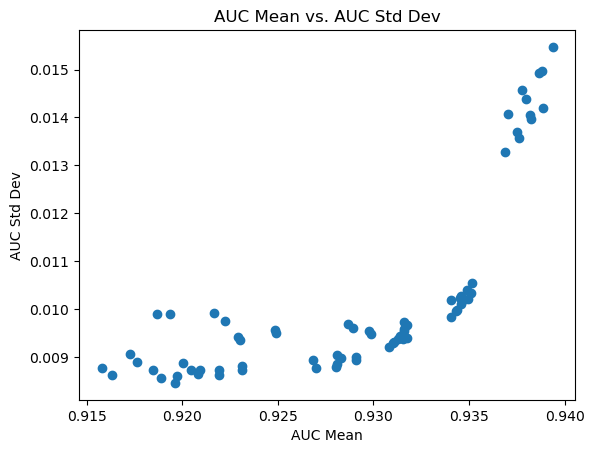

In [177]:

# Create a scatter plot with AUC Mean on the x-axis and AUC Std Dev on the y-axis

plt.scatter(table['AUC Mean'], table['AUC Std Dev'])

# Add axis labels and a title
plt.xlabel('AUC Mean')
plt.ylabel('AUC Std Dev')
plt.title('AUC Mean vs. AUC Std Dev')

# Display the plot
plt.show()

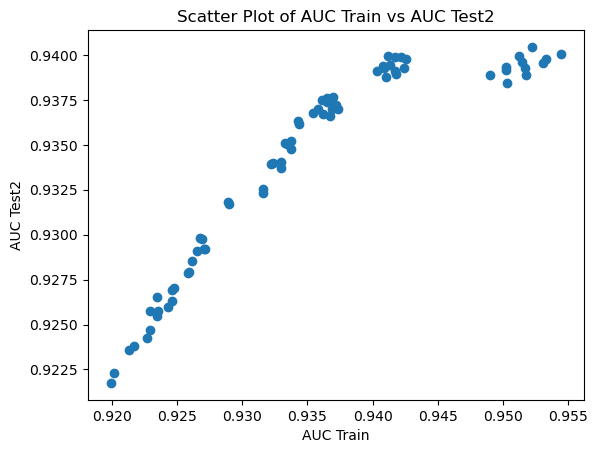

In [178]:
import matplotlib.pyplot as plt

x = table['AUC Train']
y = table['AUC Test2']

# Create scatter plot
plt.scatter(x, y)

# Set plot title and axis labels
plt.title('Scatter Plot of AUC Train vs AUC Test2')
plt.xlabel('AUC Train')
plt.ylabel('AUC Test2')

# Show plot
plt.show()


In [22]:
table.to_csv('xgboost_grid.csv',index=False)

In [179]:
%%time 

params = {
    'learning_rate': 0.1,
    'subsample': 0.5,
    'colsample_bytree': 0.5,
    'scale_pos_weight': 5,
    'objective': 'binary:logistic',
    'n_estimators': 50,
    'random_state': 42,
    'tree_method': 'gpu_hist',
}

#Final xgboost model
xgb_final = xgb.XGBClassifier(**params)
final_model = xgb_instance.fit(X_train_model2, y_train)

CPU times: user 1.46 s, sys: 16.9 ms, total: 1.47 s
Wall time: 1.17 s


In [180]:
final_auc_train = roc_auc_score(y_train, final_model.predict_proba(X_train_model2)[:,1])
final_auc_test1 = roc_auc_score(y_test1, final_model.predict_proba(X_test1_model2)[:,1])
final_auc_test2 = roc_auc_score(y_test2, final_model.predict_proba(X_test2_model2)[:,1])

In [182]:
print(f"auc final train: {final_auc_train}, auc final test1: {final_auc_test1}, auc final test2: {final_auc_test2}")

auc final train: 0.9524096884160254, auc final test1: 0.9215026485281849, auc final test2: 0.938257250253412


**Neural Network**

In [66]:
X_train_nn = X_train_model2.copy()
X_test1_nn = X_test1_model2.copy()
X_test2_nn = X_test2_model2.copy()

In [67]:
# Missing value imputation
X_train_nn.fillna(0,inplace=True)
X_test1_nn.fillna(0,inplace=True)
X_test2_nn.fillna(0,inplace = True)

Outlier Treatment

In [68]:
#outlier treatment
percentiles_df = X_train_nn.describe(percentiles=[0.01, 0.99]).transpose()

In [69]:
percentiles_df

,count,mean,std,min,1%,50%,99%,max
D_61,308149.0,0.394527,0.347155,-9.256497e-03,0.000000,0.297575,0.993249,31.744396
B_9,308149.0,0.192205,0.288200,1.527139e-07,0.000237,0.028763,1.023056,17.566190
D_45,308149.0,0.242591,0.242295,6.632750e-07,0.003004,0.165086,0.998031,1.598615
B_1,308149.0,0.124668,0.212033,-7.994529e-01,0.000524,0.032673,1.015218,1.324060
P_2,308149.0,0.649269,0.245358,-4.205811e-01,0.000000,0.682516,1.005683,1.010000
D_62,308149.0,0.174763,0.224376,-2.195090e-03,0.000000,0.078375,0.967152,10.854895
S_3,308149.0,0.202357,0.194552,-5.422622e-01,0.000000,0.159600,0.973353,3.472338
D_44,308149.0,0.112590,0.214480,0.000000e+00,0.000000,0.007395,1.003714,5.625931
D_52,308149.0,0.176815,0.174240,-7.025061e-03,0.003457,0.140351,1.006022,1.010000
B_17,308149.0,0.373152,0.458270,0.000000e+00,0.000000,0.003659,1.009496,1.009999


In [70]:
percentiles_df.sort_values(by='max', ascending = False)

,count,mean,std,min,1%,50%,99%,max
B_5,308149.0,0.081745,0.392681,8.843823e-08,0.000384,0.014767,0.987735,76.342738
D_61,308149.0,0.394527,0.347155,-9.256497e-03,0.000000,0.297575,0.993249,31.744396
B_9,308149.0,0.192205,0.288200,1.527139e-07,0.000237,0.028763,1.023056,17.566190
D_56,308149.0,0.106177,0.187608,-1.605201e-02,0.000000,0.037451,0.791796,10.956514
D_62,308149.0,0.174763,0.224376,-2.195090e-03,0.000000,0.078375,0.967152,10.854895
D_79,308149.0,0.070057,0.220859,0.000000e+00,0.000076,0.005562,1.006796,9.501493
D_43,308149.0,0.121142,0.199396,0.000000e+00,0.000000,0.059398,0.918104,8.836877
R_3,308149.0,0.128853,0.219049,1.574046e-07,0.000194,0.009756,1.004853,8.803549
D_41,308149.0,0.053911,0.185062,6.682875e-08,0.000111,0.005706,0.902171,6.168803
D_44,308149.0,0.112590,0.214480,0.000000e+00,0.000000,0.007395,1.003714,5.625931


In [71]:
index_max = percentiles_df[percentiles_df['max'] > percentiles_df['99%']].index
index_min = percentiles_df[percentiles_df['min'] < percentiles_df['1%']].index
col_index_max = index_max.to_list()
col_index_min = index_min.to_list()
len(col_index_max),len(col_index_min)

(30, 26)

In [37]:
for i in col_index_max:
    X_train_nn[i] = np.where((X_train_nn[i] > percentiles_df.loc[i,'99%']),percentiles_df.loc[i,'99%'], X_train_nn[i])
for j in col_index_min:
    X_train_nn[j] = np.where((X_train_nn[j] < percentiles_df.loc[j,'1%']),percentiles_df.loc[j,'1%'], X_train_nn[j])

In [38]:
percentiles_df = X_train_nn.describe(percentiles=[0.01, 0.99]).transpose()
percentiles_df.sort_values(by='max', ascending = False)

,count,mean,std,min,1%,50%,99%,max
B_38,308318.0,2.673412,1.579112,1.000000,1.000000,2.000000,7.000000,7.000000
B_7,308318.0,0.185520,0.225606,0.002485,0.002485,0.077931,1.019842,1.019853
R_27,308318.0,0.864978,0.345168,0.000000,0.000000,1.004168,1.009882,1.009882
B_2,308318.0,0.623455,0.399070,0.002994,0.002994,0.814348,1.009681,1.009681
B_17,308318.0,0.372494,0.458026,0.000000,0.000000,0.003673,1.009507,1.009507
R_1,308318.0,0.073535,0.199823,0.000117,0.000117,0.005808,1.008901,1.008901
P_3,308318.0,0.588826,0.177830,0.000000,0.000000,0.615292,1.006949,1.006951
D_79,308318.0,0.066227,0.193319,0.000076,0.000076,0.005559,1.006872,1.006872
D_51,308318.0,0.139001,0.229610,0.000147,0.000147,0.007199,1.006613,1.006614
R_3,308318.0,0.124870,0.189319,0.000195,0.000195,0.009748,1.006021,1.006022


In [39]:
#outlier treatment for test data set but with train sample values
for i in col_index_max:
    X_test1_nn[i] = np.where((X_test1_nn[i] > percentiles_df.loc[i,'99%']),percentiles_df.loc[i,'99%'], X_test1_nn[i])
    X_test2_nn[i] = np.where((X_test2_nn[i] > percentiles_df.loc[i,'99%']),percentiles_df.loc[i,'99%'], X_test2_nn[i])
for j in col_index_min:
    X_test1_nn[j] = np.where((X_test1_nn[j] < percentiles_df.loc[j,'1%']),percentiles_df.loc[j,'1%'], X_test1_nn[j])
    X_test2_nn[j] = np.where((X_test2_nn[j] < percentiles_df.loc[j,'1%']),percentiles_df.loc[j,'1%'], X_test2_nn[j])

In [40]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import roc_auc_score

In [41]:
%%time
# neural network
def create_nn_model(layers,units,activation,drop_rate,batch):
    # first step: create a Sequential object, as a sequence of layers. B/C NN is a sequence of layers.
    classifier = Sequential()

    # add the first hidden layer
    classifier.add(Dense(units=units,kernel_initializer='glorot_uniform',
                        activation = activation))
    classifier.add(Dropout(rate=drop_rate))

    # add the second hidden layer
    classifier.add(Dense(units=units,kernel_initializer='glorot_uniform',
                    activation = activation))
    classifier.add(Dropout(rate=drop_rate))
    
    if layers == 4:
        #add the third hidden layer
        classifier.add(Dense(units=units,kernel_initializer='glorot_uniform',
                        activation = activation))
        classifier.add(Dropout(rate=drop_rate))

        # add the fourth hidden layer
        classifier.add(Dense(units=units,kernel_initializer='glorot_uniform',
                    activation = activation))
        classifier.add(Dropout(rate=drop_rate))
        

    # add the output layer
    classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',
                        activation = 'sigmoid'))

    # add additional parameters
    classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy', 'FalseNegatives'])

    # train the model
    classifier.fit(X_train_nn,y_train,batch_size=batch,epochs=20,verbose = 0)
    
    return classifier

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 10 µs


In [42]:
# Grid search for neural network model with different parameters to find out the best model with high accuracy and low variance and bias
%%time
for layers in [2,4]:
    for node in [4,6]:
        for activation in ['relu', 'tanh']:
            for drop in [0.5,0.0]:
                for batch in [100, 10000]:
                    classifier = create_nn_model(layers,node,activation,drop,batch)
                    y_train_pred_proba = classifier.predict(X_train_nn)
                    y_test1_pred_proba = classifier.predict(X_test1_nn)
                    y_test2_pred_proba = classifier.predict(X_test2_nn)

                    # calculate AUC
                    train_auc = roc_auc_score(y_train, y_train_pred_proba)
                    test1_auc = roc_auc_score(y_test1, y_test1_pred_proba)
                    test2_auc = roc_auc_score(y_test2, y_test2_pred_proba)

                    print("==================================")
                    print(f'hidden layers: {layers}')
                    print(f'batch: {batch}')
                    print(f'drop: {drop}')
                    print(f'activation: {activation}')
                    print(f'Node: {node}')
                    print("Train AUC:", train_auc)
                    print("Test1 AUC:", test1_auc)
                    print("Test2 AUC:", test2_auc)
                    print("==================================")

2776/2776 [==============================] - 4s 2ms/step
hidden layers: 2
batch: 100
drop: 0.5
activation: relu
Node: 4
Train AUC: 0.9289607233605639
Test1 AUC: 0.9151100730232422
Test2 AUC: 0.9358491950021456
2776/2776 [==============================] - 4s 1ms/step
hidden layers: 2
batch: 10000
drop: 0.5
activation: relu
Node: 4
Train AUC: 0.9210454691566571
Test1 AUC: 0.9061797342490946
Test2 AUC: 0.9290509139122785
2776/2776 [==============================] - 4s 1ms/step
hidden layers: 2
batch: 100
drop: 0.0
activation: relu
Node: 4
Train AUC: 0.9309462306066445
Test1 AUC: 0.9176262913355581
Test2 AUC: 0.9372129799539909
2776/2776 [==============================] - 4s 1ms/step
hidden layers: 2
batch: 10000
drop: 0.0
activation: relu
Node: 4
Train AUC: 0.9277673273953374
Test1 AUC: 0.9137102684381414
Test2 AUC: 0.9350558312905205
2776/2776 [==============================] - 4s 2ms/step
hidden layers: 2
batch: 100
drop: 0.5
activation: tanh
Node: 4
Train AUC: 0.928054842259809
Test1 A

In [38]:
# I choose xgboost because its AUC scores are slightly better and i have tested more hyperparameters, ITS MUCH FASTER

In [92]:
# Function to calculate the default rate and revenue for the company
#we are summing up the balance and spend variables of the customer and assuming the loss throught default rates to be 0
def default_rate_and_revenue(data,target, threshold):
    # calculate predicted probabilities
    y_pred_prob = final_model.predict_proba(data)
    
    # create a new column in the data frame for predicted probabilities
    data['y_pred_prob'] = y_pred_prob[:,1]
    data['target'] = target
    
    accepted_and_defaulted = data[(data['y_pred_prob'] < threshold) & (data['target'] == 1)]
    accepted_customers = data[data['y_pred_prob'] < threshold]
    # calculate default rate
    default_rate = len(accepted_and_defaulted) / len(accepted_customers)
    # calculate revenue among customers who are accepted based on the threshold
    revenue = (accepted_customers['B_1'].sum() * 0.02) + (accepted_customers['S_3'].sum() * 0.001)
    
    return default_rate, revenue, len(accepted_and_defaulted)


In [93]:
%%time
for i in np.arange(0.1,1.1,0.1):
    data = X_train_model2.copy()
    d,r,ad = default_rate_and_revenue(data,y_train,i)
    print(f'for threshold {i}.The default rate is {d*100}% and the revenue is {r} and number of defaults are {ad}')

for threshold 0.1.The default rate is 0.01988387815159469% and the revenue is 77.1731982564243 and number of defaults are 25
for threshold 0.2.The default rate is 0.09861796915947146% and the revenue is 98.67200463985039 and number of defaults are 143
for threshold 0.30000000000000004.The default rate is 0.2257928334761862% and the revenue is 115.61391233732681 and number of defaults are 353
for threshold 0.4.The default rate is 0.44049126591251975% and the revenue is 132.07499426447112 and number of defaults are 727
for threshold 0.5.The default rate is 0.7488539128627352% and the revenue is 150.8049193940296 and number of defaults are 1297
for threshold 0.6.The default rate is 1.2339762129049672% and the revenue is 172.8673057408108 and number of defaults are 2240
for threshold 0.7000000000000001.The default rate is 2.013819509464952% and the revenue is 203.2714226652468 and number of defaults are 3850
for threshold 0.8.The default rate is 3.545995082625604% and the revenue is 251.64

In [96]:
%%time
for i in np.arange(0.9,1.0,0.01):
    data = X_train_model2.copy()
    d,r, ad = default_rate_and_revenue(data,y_train,i)
    print(f'for threshold {i}.The default rate is {d*100}% and the revenue is {r} and the number of defaults is {ad}')

for threshold 0.9.The default rate is 7.322485207100591% and the revenue is 353.1347297038231 and the number of defaults is 16632
for threshold 0.91.The default rate is 8.044124401001724% and the revenue is 370.62430367942915 and the number of defaults is 18566
for threshold 0.92.The default rate is 8.921841368690608% and the revenue is 391.77840170847753 and the number of defaults is 20974
for threshold 0.93.The default rate is 9.937978809426554% and the revenue is 416.23454914069214 and the number of defaults is 23843
for threshold 0.9400000000000001.The default rate is 11.143235264175914% and the revenue is 445.40625617673504 and the number of defaults is 27365
for threshold 0.9500000000000001.The default rate is 12.61944143651011% and the revenue is 480.04345127708297 and the number of defaults is 31815
for threshold 0.9600000000000001.The default rate is 14.468232309643694% and the revenue is 522.849338618966 and the number of defaults is 37642
for threshold 0.9700000000000001.The

In [99]:
%%time
for i in np.arange(0.93,0.9431,0.0001):
    data = X_train_model2.copy()
    d,r,ad = default_rate_and_revenue(data,y_train,i)
    print(f'for threshold {i}.The default rate is {d*100}% and the revenue is {r} and the number of defaults is {ad}')

for threshold 0.93.The default rate is 9.937978809426554% and the revenue is 416.23454914069214 and the number of defaults is 23843
for threshold 0.9301.The default rate is 9.945283231164805% and the revenue is 416.5038562177115 and the number of defaults is 23865
for threshold 0.9302.The default rate is 9.95658550405813% and the revenue is 416.7202997093009 and the number of defaults is 23897
for threshold 0.9303.The default rate is 9.970008747448661% and the revenue is 417.0248250056691 and the number of defaults is 23935
for threshold 0.9304.The default rate is 9.982716614955333% and the revenue is 417.1989031184045 and the number of defaults is 23970
for threshold 0.9305.The default rate is 9.996127791217164% and the revenue is 417.51380830097355 and the number of defaults is 24008
for threshold 0.9306.The default rate is 10.006577249377658% and the revenue is 417.8432480538554 and the number of defaults is 24038
for threshold 0.9307.The default rate is 10.019060936732673% and the 

In [100]:
%%time
#test1
for i in np.arange(0.1,1.1,0.1):
    data = X_test1_model2.copy()
    d,r, ad = default_rate_and_revenue(data,y_test1,i)
    print(f'for threshold {i}.The default rate is {d*100}% and the revenue is {r} and the number of defaults is {ad}')

for threshold 0.1.The default rate is 0.682452303747832% and the revenue is 15.26475107801853and the number of defaults is 181
for threshold 0.2.The default rate is 1.0736546682766048% and the revenue is 19.379543591495953and the number of defaults is 329
for threshold 0.30000000000000004.The default rate is 1.4508523757707652% and the revenue is 22.73875174805904and the number of defaults is 480
for threshold 0.4.The default rate is 1.9361277445109781% and the revenue is 26.05798416141188and the number of defaults is 679
for threshold 0.5.The default rate is 2.4473055193394178% and the revenue is 29.492614362481596and the number of defaults is 901
for threshold 0.6.The default rate is 3.1376805975549873% and the revenue is 34.296304109756605and the number of defaults is 1214
for threshold 0.7000000000000001.The default rate is 4.078575813382443% and the revenue is 40.51654922351926and the number of defaults is 1661
for threshold 0.8.The default rate is 5.691524877397371% and the reven

In [101]:
%%time
#test1
for i in np.arange(0.9,1.0,0.01):
    data = X_test1_model2.copy()
    d,r,ad = default_rate_and_revenue(data,y_test1,i)
    print(f'for threshold {i}.The default rate is {d*100}% and the revenue is {r} and the number of defaults is {ad}')

for threshold 0.9.The default rate is 9.44700460829493% and the revenue is 70.99451622221468 and the number of defaults is 4551
for threshold 0.91.The default rate is 10.062970232253845% and the revenue is 74.67326838624749 and the number of defaults is 4922
for threshold 0.92.The default rate is 10.888942423512407% and the revenue is 78.88118614086856 and the number of defaults is 5424
for threshold 0.93.The default rate is 11.783922070254846% and the revenue is 83.46859436341161 and the number of defaults is 5988
for threshold 0.9400000000000001.The default rate is 12.85904178466162% and the revenue is 88.75456594503 and the number of defaults is 6675
for threshold 0.9500000000000001.The default rate is 14.128064370582042% and the revenue is 95.25747396255183 and the number of defaults is 7515
for threshold 0.9600000000000001.The default rate is 15.682690550173643% and the revenue is 102.99707140216229 and the number of defaults is 8580
for threshold 0.9700000000000001.The default ra

In [105]:
%%time
for i in np.arange(0.9,0.91,0.001):
    data = X_test1_model2.copy()
    d,r,ad = default_rate_and_revenue(data,y_test1,i)
    print(f'for threshold {i}.The default rate is {d*100}% and the revenue is {r} and the number of defaults is {ad}')

for threshold 0.9.The default rate is 9.44700460829493% and the revenue is 70.99451622221468 and the number of defaults is 4551
for threshold 0.901.The default rate is 9.503181544966527% and the revenue is 71.32781029026069 and the number of defaults is 4585
for threshold 0.902.The default rate is 9.567862908232955% and the revenue is 71.73087221779708 and the number of defaults is 4623
for threshold 0.903.The default rate is 9.635965455972894% and the revenue is 72.1083191129833 and the number of defaults is 4664
for threshold 0.904.The default rate is 9.697720004126689% and the revenue is 72.42819455955107 and the number of defaults is 4700
for threshold 0.905.The default rate is 9.740768216287504% and the revenue is 72.7705434103785 and the number of defaults is 4727
for threshold 0.906.The default rate is 9.811545899683166% and the revenue is 73.20533250374787 and the number of defaults is 4769
for threshold 0.907.The default rate is 9.862974299977402% and the revenue is 73.5570275

In [106]:
%%time
#test2
for i in np.arange(0.1,1.1,0.1):
    data = X_test2_model2.copy()
    d,r, ad = default_rate_and_revenue(data,y_test2,i)
    print(f'for threshold {i}.The default rate is {d*100}% and the revenue is {r} and the number of defaults is {ad}')

for threshold 0.1.The default rate is 0.3871007071445989% and the revenue is 22.296880440015187 and the number of defaults is 127
for threshold 0.2.The default rate is 0.6671375873165372% and the revenue is 28.638660435059208 and the number of defaults is 255
for threshold 0.30000000000000004.The default rate is 0.9017262995467259% and the revenue is 33.789081019464426 and the number of defaults is 374
for threshold 0.4.The default rate is 1.273277096928219% and the revenue is 38.92351000352707 and the number of defaults is 560
for threshold 0.5.The default rate is 1.629415694980279% and the revenue is 45.09948528245273 and the number of defaults is 756
for threshold 0.6.The default rate is 2.2413828330915555% and the revenue is 52.63754674985309 and the number of defaults is 1097
for threshold 0.7000000000000001.The default rate is 3.0179728478864547% and the revenue is 62.39382123857319 and the number of defaults is 1565
for threshold 0.8.The default rate is 4.706974750901754% and th

In [104]:
%%time
#test2
for i in np.arange(0.9,1.0,0.01):
    data = X_test2_model2.copy()
    d,r, ad = default_rate_and_revenue(data,y_test2,i)
    print(f'for threshold {i}.The default rate is {d*100}% and the revenue is {r} and the number of defaults is {ad}')

for threshold 0.9.The default rate is 8.540149444716514% and the revenue is 112.56748802244093 and the number of defaults is 5406
for threshold 0.91.The default rate is 9.231342472559035% and the revenue is 117.93565528247517 and the number of defaults is 5946
for threshold 0.92.The default rate is 10.04735151266006% and the revenue is 124.5287569940648 and the number of defaults is 6599
for threshold 0.93.The default rate is 11.002503278102276% and the revenue is 131.97559918966445 and the number of defaults is 7384
for threshold 0.9400000000000001.The default rate is 12.127736960791445% and the revenue is 141.12695623047256 and the number of defaults is 8336
for threshold 0.9500000000000001.The default rate is 13.497097550615885% and the revenue is 152.05062853754447 and the number of defaults is 9533
for threshold 0.9600000000000001.The default rate is 15.25186567164179% and the revenue is 165.11878113550517 and the number of defaults is 11118
for threshold 0.9700000000000001.The de

In [107]:
%%time
for i in np.arange(0.91,0.92,0.001):
    data = X_test2_model2.copy()
    d,r, ad = default_rate_and_revenue(data,y_test2,i)
    print(f'for threshold {i}.The default rate is {d*100}% and the revenue is {r} and the number of defaults is {ad}')

for threshold 0.91.The default rate is 9.231342472559035% and the revenue is 117.93565528247517 and the number of defaults is 5946
for threshold 0.911.The default rate is 9.297171638899652% and the revenue is 118.4357740970418 and the number of defaults is 5999
for threshold 0.912.The default rate is 9.387616204426982% and the revenue is 119.06972837812835 and the number of defaults is 6069
for threshold 0.913.The default rate is 9.454764441562052% and the revenue is 119.54853711167578 and the number of defaults is 6123
for threshold 0.914.The default rate is 9.53467223600857% and the revenue is 120.19886965708433 and the number of defaults is 6186
for threshold 0.915.The default rate is 9.626416893523432% and the revenue is 120.9761633849799 and the number of defaults is 6259
for threshold 0.916.The default rate is 9.72806236763758% and the revenue is 121.78440467287746 and the number of defaults is 6339
for threshold 0.917.The default rate is 9.803200857646068% and the revenue is 122

In [184]:
# Rank Ordering for xgboost model
perf_train_data = pd.DataFrame({"Actual": y_train, "Prediction": final_model.predict_proba(X_train_model2)[:,1]})
quantiles = list(set(perf_train_data.Prediction.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
quantiles.sort()
quantiles.insert(0,0)
quantiles.insert(len(quantiles),1)

perf_train_data["Score Bins"] = pd.cut(perf_train_data["Prediction"], quantiles)
stat = perf_train_data.groupby("Score Bins")["Actual"].agg(["sum", "count"])
stat["Bad Rate"] = stat["sum"] / stat["count"]
stat = stat.sort_values(by = 'Bad Rate', ascending = False)
stat

,sum,count,Bad Rate
Score Bins,,,
"(0.824, 1.0]",28935,30815,0.938991
"(0.637, 0.824]",23528,30815,0.763524
"(0.397, 0.637]",15757,30815,0.511342
"(0.168, 0.397]",7888,30815,0.255979
"(0.0486, 0.168]",2428,30814,0.078795
"(0.0151, 0.0486]",648,30815,0.021029
"(0.00609, 0.0151]",183,30815,0.005939
"(0.00282, 0.00609]",60,30815,0.001947
"(0.00124, 0.00282]",15,30815,0.000487


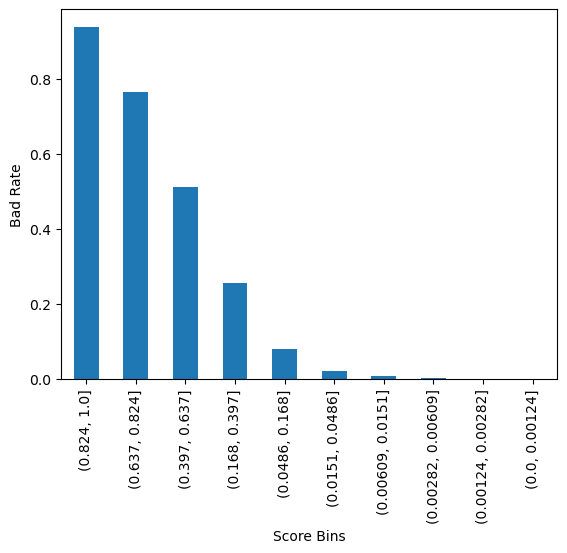

In [185]:

# Plot the bar chart
ax = stat.plot.bar(y='Bad Rate', legend=False)
ax.set_ylabel("Bad Rate")
ax.set_xlabel("Score Bins")
plt.show()

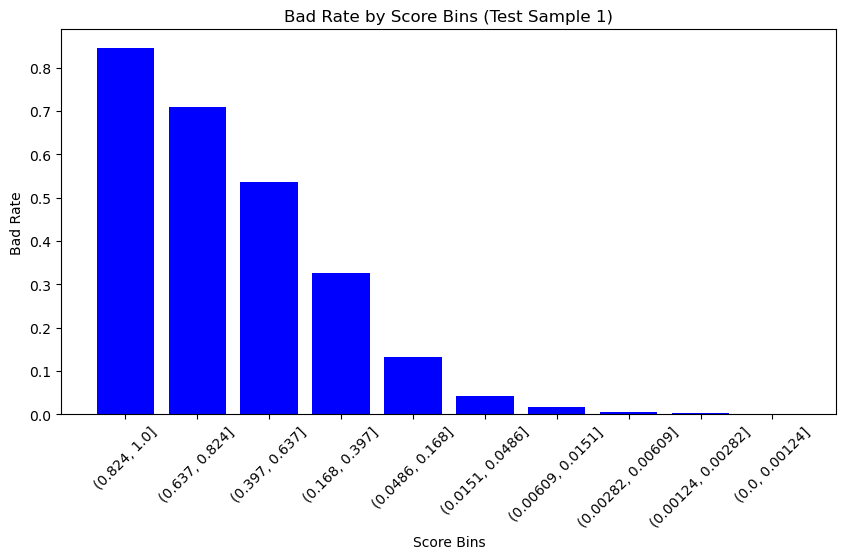

In [195]:
# Rank Ordering xgboost
perf_train_data = pd.DataFrame({"Actual": y_train, "Prediction": final_model.predict_proba(X_train_model2)[:,1]})
quantiles = list(set(perf_train_data.Prediction.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
quantiles.sort()
quantiles.insert(0, 0)
quantiles.insert(len(quantiles), 1)

# Define score bins based on train sample
train_bins = pd.cut(perf_train_data["Prediction"], quantiles)

# Assign the categories attribute to train_bins object
train_bins = pd.Series(train_bins.cat.categories)

# Apply the same score bins to test sample
perf_test_data = pd.DataFrame({"Actual": y_test1, "Prediction": final_model.predict_proba(X_test1_model2)[:,1]})
test_bins = pd.cut(perf_test_data["Prediction"], quantiles, labels=train_bins)

perf_test_data["Score Bins"] = test_bins
stat = perf_test_data.groupby("Score Bins")["Actual"].agg(["sum", "count"])
stat["Bad Rate"] = stat["sum"] / stat["count"]
stat.sort_values(by='Bad Rate', ascending=False, inplace=True)

# Plot a bar chart for stat
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(x=stat.index.astype(str), height=stat["Bad Rate"], color='blue')
plt.xticks(rotation=45)
plt.xlabel('Score Bins')
plt.ylabel('Bad Rate')
plt.title('Bad Rate by Score Bins (Test Sample 1)')
plt.show()

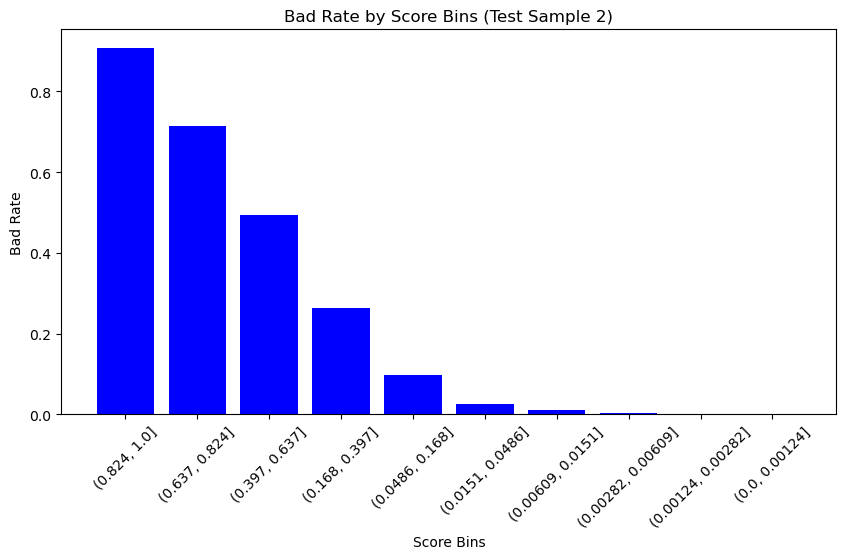

In [197]:
# Rank Ordering xgboost
perf_train_data = pd.DataFrame({"Actual": y_train, "Prediction": final_model.predict_proba(X_train_model2)[:,1]})
quantiles = list(set(perf_train_data.Prediction.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
quantiles.sort()
quantiles.insert(0, 0)
quantiles.insert(len(quantiles), 1)

# Define score bins based on train sample
train_bins = pd.cut(perf_train_data["Prediction"], quantiles)

# Assign the categories attribute to train_bins object
train_bins = pd.Series(train_bins.cat.categories)

# Apply the same score bins to test sample
perf_test_data = pd.DataFrame({"Actual": y_test2, "Prediction": final_model.predict_proba(X_test2_model2)[:,1]})
test_bins = pd.cut(perf_test_data["Prediction"], quantiles, labels=train_bins)

perf_test_data["Score Bins"] = test_bins
stat = perf_test_data.groupby("Score Bins")["Actual"].agg(["sum", "count"])
stat["Bad Rate"] = stat["sum"] / stat["count"]
stat.sort_values(by='Bad Rate', ascending=False, inplace=True)

# Plot a bar chart for stat
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(x=stat.index.astype(str), height=stat["Bad Rate"], color='blue')
plt.xticks(rotation=45)
plt.xlabel('Score Bins')
plt.ylabel('Bad Rate')
plt.title('Bad Rate by Score Bins (Test Sample 2)')
plt.show()

In [125]:
grouped = train.groupby(pd.Grouper(key='Date', freq='M'))
monthly_obs = grouped.size()
default_counts = grouped['target'].sum()
default_rates = default_counts / monthly_obs

In [126]:
results = pd.concat([monthly_obs, default_counts, default_rates], axis=1)
results.columns = ['Num_Observations', 'Default_Count', 'Default_Rate']

In [127]:
results

,Num_Observations,Default_Count,Default_Rate
Date,,,
2017-05-31,31029,7410,0.238809
2017-06-30,32005,7787,0.243306
2017-07-31,32602,8047,0.246825
2017-08-31,33022,8320,0.251953
2017-09-30,33896,8653,0.255281
2017-10-31,34693,9125,0.263021
2017-11-30,35587,9511,0.267261
2017-12-31,36685,9981,0.272073
2018-01-31,38630,10613,0.274735


In [128]:
results['Default_Count'].sum()/results['Num_Observations'].sum()

0.2578200805454504

In [129]:
results['Num_Observations'].sum()

308149

In [148]:
grouped = test1.groupby(pd.Grouper(key='Date', freq='M'))
monthly_obs = grouped.size()
default_counts = grouped['target'].sum()
default_rates = default_counts / monthly_obs

In [149]:
results = pd.concat([monthly_obs, default_counts, default_rates], axis=1)
results.columns = ['Num_Observations', 'Default_Count', 'Default_Rate']

In [150]:
results

,Num_Observations,Default_Count,Default_Rate
Date,,,
2017-03-31,30905,7094,0.229542
2017-04-30,31082,7372,0.237179


In [151]:
results['Default_Count'].sum()/results['Num_Observations'].sum()

0.23337151338183812

In [152]:
results['Num_Observations'].sum()

61987

In [153]:
grouped = test2.groupby(pd.Grouper(key='Date', freq='M'))
monthly_obs = grouped.size()
default_counts = grouped['target'].sum()
default_rates = default_counts / monthly_obs

In [154]:
results = pd.concat([monthly_obs, default_counts, default_rates], axis=1)
results.columns = ['Num_Observations', 'Default_Count', 'Default_Rate']

In [155]:
results

,Num_Observations,Default_Count,Default_Rate
Date,,,
2018-02-28,41845,11619,0.277668
2018-03-31,46985,13308,0.283239


In [156]:
results['Default_Count'].sum()/results['Num_Observations'].sum()

0.2806146572104019

In [157]:
results['Num_Observations'].sum()

88830

In [123]:
import shap
# assume that you have already trained an XGBoost model called `xgb_model`
# and loaded the test data into a pandas DataFrame called `test_data`

# randomly sample a subset of the test data
filled_train_model2 = X_train_model2.fillna(0)
test_data_subset = filled_train_model2.sample(n=50000, random_state=42)

# use the SHAP library to compute SHAP values for each feature on the test data subset
explainer = shap.Explainer(final_model)
shap_values = explainer(test_data_subset)

# compute the mean absolute SHAP values for each feature
mean_abs_shap_values = np.abs(shap_values.values).mean(axis=0)

# find the indices of the top 5 features with highest mean absolute SHAP values
top_5_feature_indices = np.argsort(mean_abs_shap_values)[-5:]

# print the names of the top 5 features and their corresponding mean absolute SHAP values
feature_names = filled_train_model2.columns
for i in reversed(top_5_feature_indices):
    print(feature_names[i], mean_abs_shap_values[i])

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


P_2 1.2784803
S_3 0.32521254
D_45 0.2529532
B_17 0.24307047
B_1 0.23619127


In [124]:
# Summary statistics
import numpy as np
import pandas as pd

# Assume `df` is a pandas DataFrame with columns 'col1', 'col2', 'col3', 'col4', 'col5'

# Define a list of column names
cols = ['P_2', 'S_3', 'D_45', 'B_1', 'B_17']
df = X_train_model2.copy()
# Loop over each column
for col in cols:
    # Calculate summary statistics
    col_min = df[col].min()
    col_p1 = np.percentile(df[col], 1)
    col_p5 = np.percentile(df[col], 5)
    col_median = df[col].median()
    col_p95 = np.percentile(df[col], 95)
    col_p99 = np.percentile(df[col], 99)
    col_max = df[col].max()
    col_mean = df[col].mean()
    col_missing = df[col].isnull().mean() * 100

    # Print summary statistics
    print(f"Column: {col}")
    print(f"Min: {col_min}")
    print(f"1 percentile: {col_p1}")
    print(f"5 percentile: {col_p5}")
    print(f"Median: {col_median}")
    print(f"95 percentile: {col_p95}")
    print(f"99 percentile: {col_p99}")
    print(f"Max: {col_max}")
    print(f"Mean: {col_mean}")
    print(f"% Missing: {col_missing}")

Column: P_2
Min: -0.4205810549036094
1 percentile: nan
5 percentile: nan
Median: 0.6841632012356691
95 percentile: nan
99 percentile: nan
Max: 1.0099997995593866
Mean: 0.6517664621448619
% Missing: 0.3832561520563104
Column: S_3
Min: -0.5422621618177562
1 percentile: nan
5 percentile: nan
Median: 0.1671967366115356
95 percentile: nan
99 percentile: nan
Max: 3.4723380204210983
Mean: 0.22994327389207442
% Missing: 11.997118277197071
Column: D_45
Min: 6.632750010171496e-07
1 percentile: 0.00300400356901268
5 percentile: 0.009071400299240022
Median: 0.1650863090265636
95 percentile: 0.76359571343078
99 percentile: 0.9980309491195334
Max: 1.5986145450945144
Mean: 0.2425910298140027
% Missing: 0.0
Column: B_1
Min: -0.7994529262402932
1 percentile: 0.000524267853612996
5 percentile: 0.00220829639510074
Median: 0.0326734657688881
95 percentile: 0.6021669880490992
99 percentile: 1.0152180285284906
Max: 1.3240603729357254
Mean: 0.12466762021019857
% Missing: 0.0
Column: B_17
Min: 4.8785975195864

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
39.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
73.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
77.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
79.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
80.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
79.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
81.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
83.3% of the points cannot be placed; you may want to decrease the size of the marker

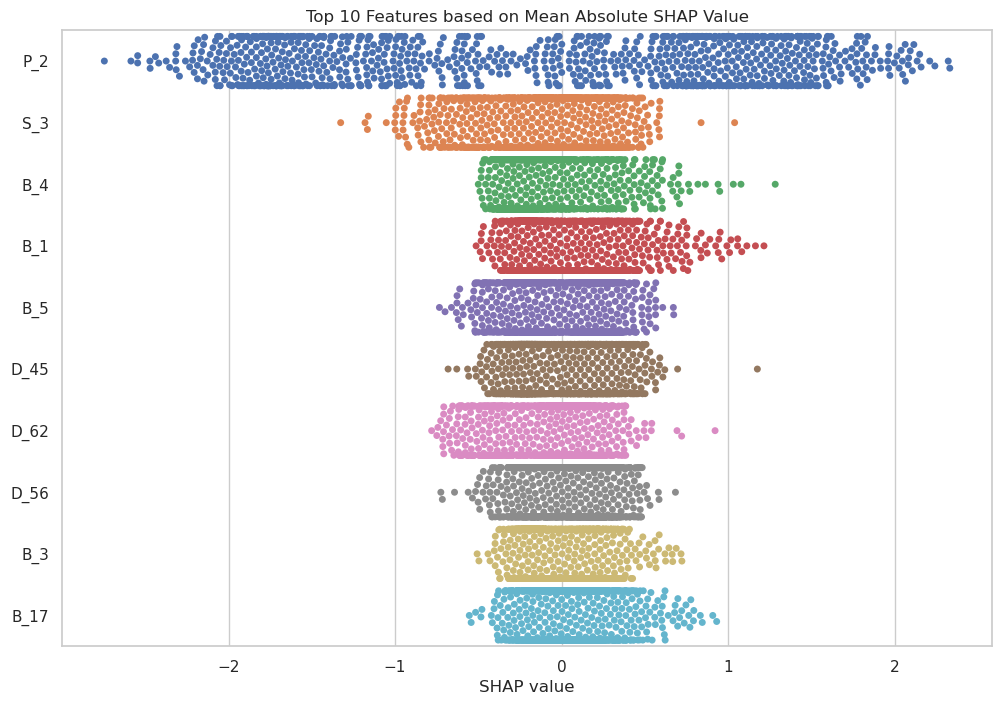

In [199]:
#Shap value analysis (Beeswarm plot) for the XGBoost model
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# assume that you have already trained an XGBoost model called `final_model`
# and loaded the test data into a pandas DataFrame called `df_test2_combined`

# randomly sample a subset of the test data
bswarm_test2 = X_test2_model2.fillna(0)
test_data_subset = bswarm_test2.sample(n=1000, random_state=42)

# use the SHAP library to compute SHAP values for each feature on the test data subset
explainer = shap.Explainer(final_model)
shap_values = explainer(test_data_subset)

# create a DataFrame of the SHAP values and feature names
shap_df = pd.DataFrame(shap_values.values, columns=test_data_subset.columns)

# calculate the absolute SHAP values for each feature
abs_shap_df = shap_df.abs()

# calculate the mean absolute SHAP value for each feature
mean_abs_shap_df = abs_shap_df.mean()

# sort the features by their mean absolute SHAP value, in descending order
sorted_idx = mean_abs_shap_df.argsort()[::-1]

# select the top 10 features with the highest mean absolute SHAP value
top_n = 10
top_features = test_data_subset.columns[sorted_idx][:top_n]

# create the beeswarm plot using the selected features
sns.set(style="whitegrid")
plt.figure(figsize=(12,8))
sns.swarmplot(data=shap_df[top_features], orient='h')
plt.xlabel("SHAP value")
plt.title(f"Top {top_n} Features based on Mean Absolute SHAP Value")
plt.show()

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


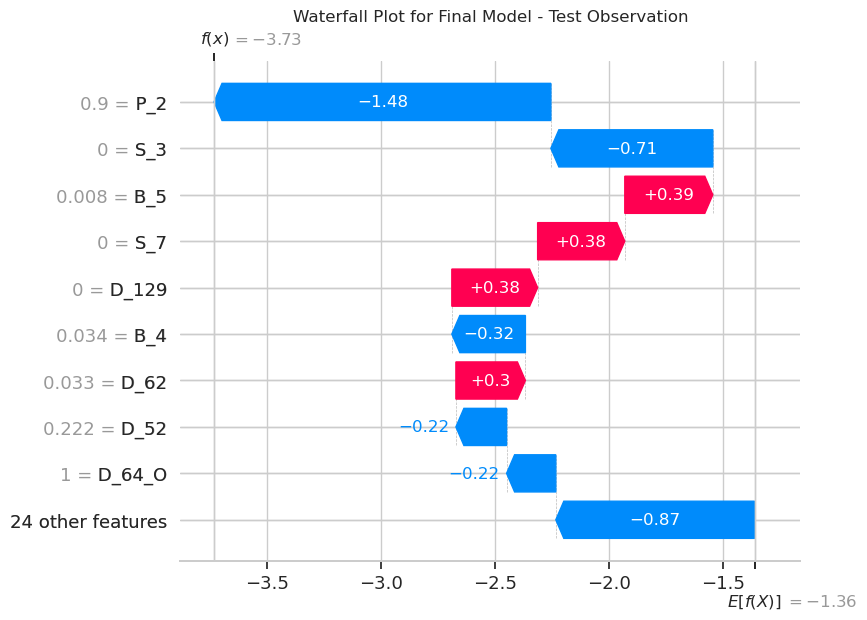

In [200]:
# waterfall analysis plot for the model
import shap
import pandas as pd
import matplotlib.pyplot as plt

# assume that you have already trained an XGBoost model called `final_model`
# and loaded the test data into a pandas DataFrame called `df_test2_combined`

# randomly select one observation from the test data
waterfall_test2 = X_test2_model2.fillna(0)
test_data_subset = waterfall_test2.sample(n=1000, random_state=42)

# use the SHAP library to compute the SHAP values for the selected observation
explainer = shap.Explainer(final_model)
shap_values = explainer(test_data_subset)

# plot the waterfall plot for the selected observation
plt.figure(figsize=(12,6))
shap.plots.waterfall(shap_values[0], max_display=10, show=False)
plt.title("Waterfall Plot for Final Model - Test Observation")
plt.show()